### Importing Necessary Packages

In [77]:
import pandas as pd
import numpy as np

# Problem Statement:
- ### to predict lung capacity of a person based on following factors:
    - Age: age of the person.
    - Height: Height of the person.
    - Smoke: weather a person smokes or not.
    - Gender: Gender of the person.
    - Caesarean: weather a feamale is gone through caesarean or not.

### Step 1 Reading data

In [78]:
df = pd.read_csv(r"./Data/LungCapData.csv")
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


### Step 2 data preprocessing

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


#### Checking nulls

In [80]:
df.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

- No nulls to be found

#### Numeric data descripsion

In [81]:
df.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


- as we can see the mean age, height and lungcap are 12.32, 64.83 and 7.86 respectivly.

#### Step 3 EDA

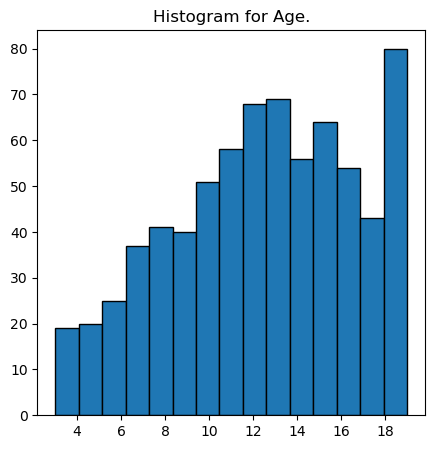

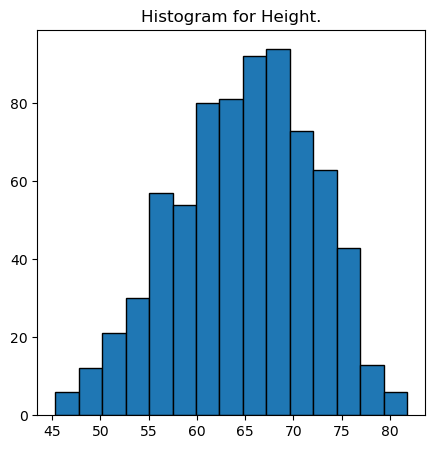

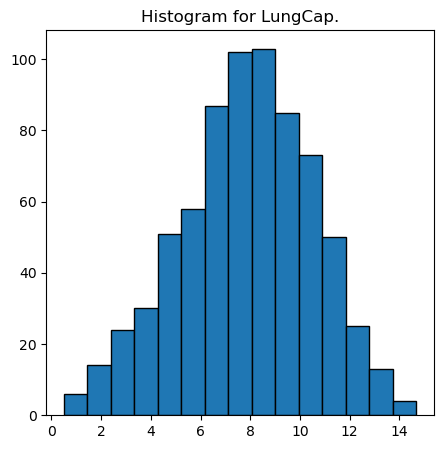

In [82]:
import matplotlib.pyplot as plt

eda1 = df[["Age", "Height", "LungCap"]]
for col in eda1.columns:
    plt.figure(figsize=(5,5))
    plt.hist(data=eda1, x=col, bins=15, edgecolor='k')
    plt.title(f"Histogram for {col}.")
    plt.show()

- we can see that the height and LungCap are having normal distribution but not age.

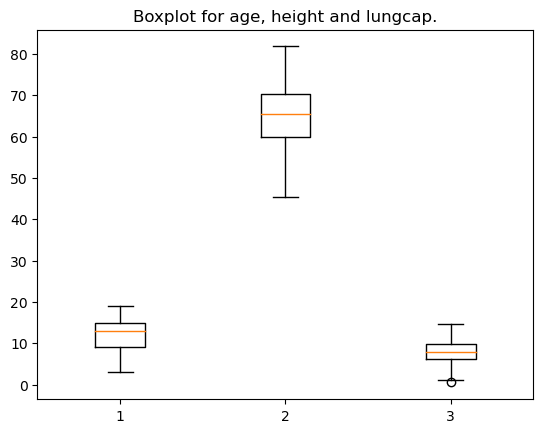

In [83]:
plt.boxplot(eda1);
plt.title("Boxplot for age, height and lungcap.");

- As we can see there are no outliers.

In [84]:
df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

Text(0.5, 1.0, 'LungCap distribution for smoker and non smoker.')

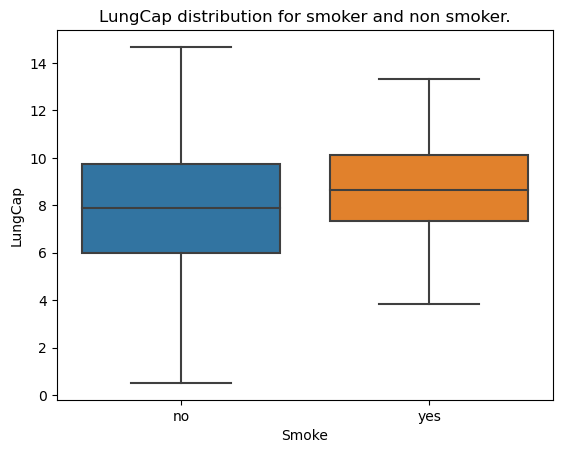

In [85]:
import seaborn as sns

sns.boxplot(data=df, x='Smoke', y='LungCap')
plt.title("LungCap distribution for smoker and non smoker.")

- it seems that the lungcap of smoker is more in terms of median then a non smoker.

C:\Users\rushi\AppData\Local\Temp\ipykernel_8980\2367857567.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap="coolwarm")


<Axes: >

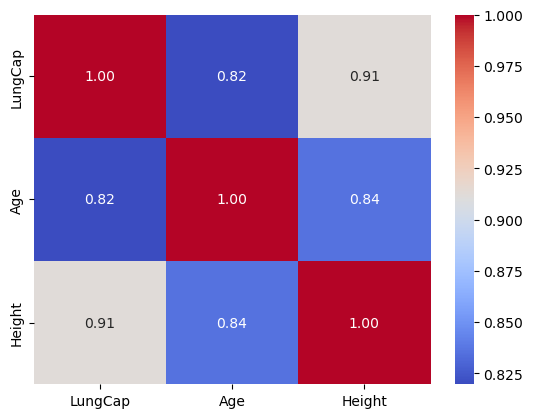

In [86]:
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap="coolwarm")

- As we can see lunngcap is having high correlation with age and height.

### Labelencoding converting non numeric columns to numeric.

In [87]:
from sklearn.preprocessing import LabelEncoder

df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)

In [88]:
# df["LungCap"] = np.log(df['LungCap'])

### Step 3 Data smapling preparing data for training and testing

In [89]:
from sklearn.model_selection import train_test_split

df_tr, df_ts = train_test_split(df, test_size=.2)

df_tr_x = df_tr.iloc[:,1:]
df_tr_y = df_tr.iloc[:,0]

df_ts_x = df_ts.iloc[:,1:]
df_ts_y = df_ts.iloc[:,0]

In [90]:
# Checking train and test size
df_tr_x.shape, df_tr_y.shape, df_ts_x.shape, df_ts_y.shape

((580, 5), (580,), (145, 5), (145,))

### Step 4 Model building

In [91]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# fit train data to model
linreg.fit(df_tr_x, df_tr_y)

LinearRegression()

### Evaluating model performance

In [92]:
rsq = linreg.score(df_tr_x, df_tr_y)
print(f"Rsquare: {rsq}")
adjrsq = 1 - ( 1 - rsq )*(df_tr_x.shape[0]-1)/(df_tr_x.shape[0]-df_tr_x.shape[1]-1)
print(f"Adjusted rsquare: {adjrsq}")

Rsquare: 0.8568990471167913
Adjusted rsquare: 0.8556525231369725


In [93]:
pred_tr = linreg.predict(df_tr_x)
pred_ts = linreg.predict(df_ts_x)

err_tr = df_tr_y - pred_tr
err_ts = df_ts_y - pred_ts

### Checking assumptions on train data

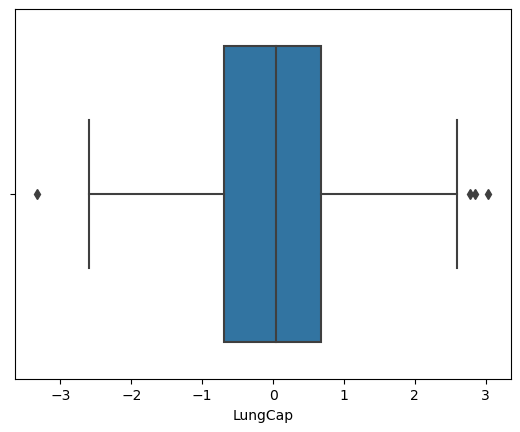

In [94]:
sns.boxplot(x=err_tr);

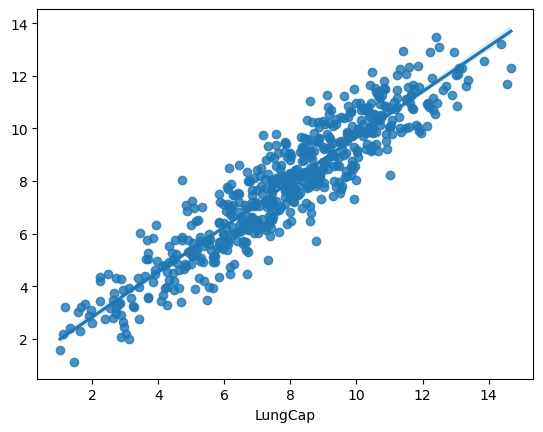

In [95]:
sns.regplot(x=df_tr_y, y=pred_tr);

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(df_ts_y, pred_ts)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df_ts_y, pred_ts)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute per error: {mape}")
print(f"Accuracy: {(1-mape)*100}")

Mean squared error: 1.0916009757783
Root mean squared error: 1.044797097899061
Mean absolute per error: 0.15428613184166434
Accuracy: 84.57138681583356


### Conclusion:
- model is having accuracy of around 85
- so the model semms to perform good.